### The  Imports!

In [ ]:
import pandas as pd
### Import classes 
from people import *
from person import *
from stockExchange import *


people = People()
stockExchange = StockPortfolio()

from stock import *

from featureCreator import *

from processPoly import *


from grapher import *



### Makeing CSV files here!
def get_data():
    make_csv_files()

def proccess_polymarket_data():
    process_poly()
    




db-dtypes is installed correctly.


In [ ]:
## We do not make csv each time,but rather read in the pickles

def read_in_pickles():

    with open('./data/people_all.pkl', 'rb') as input:
        people = pickle.load(input)


    print(len(people.people))
    
    with open('./data/stocks.pkl', 'rb') as input:
        stockExchange = pickle.load(input)

    print(len(stockExchange.stocks))

    return people, stockExchange




people, stockExchange = read_in_pickles()





70602
4706


In [ ]:
## to calculate the featrues of news, we had to first identify the news events
def get_news_events():
    return stockExchange.identify_news_events()

#news_events = get_news_events()

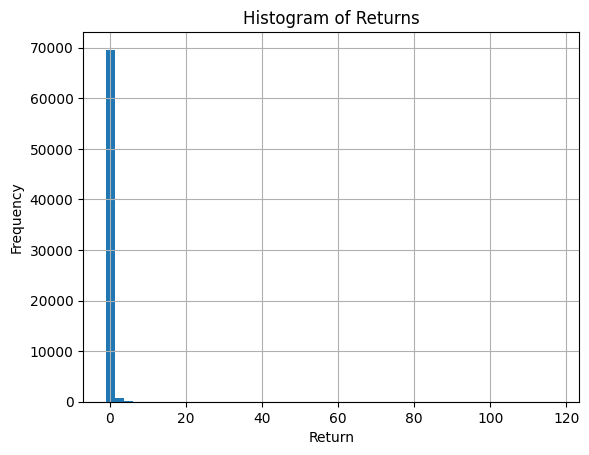

In [ ]:
# Insepcting the returns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/features_all_plus_rets.csv')

df["return"].hist(bins=50)  # you can adjust bins to your liking
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.title("Histogram of Returns")
plt.show()


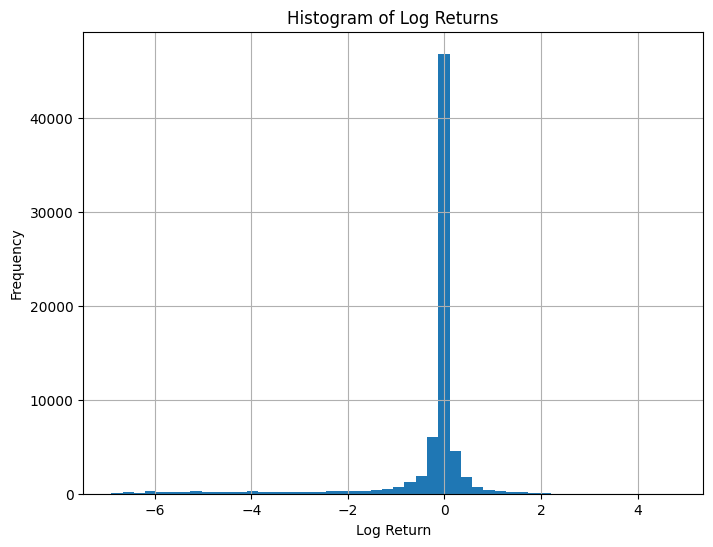

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('./data/features_all_plus_rets.csv')

# Convert simple returns to log returns
df["log_return"] = np.log1p(df["return"])

#df["log_return"] = df["return"]

# Create the plot
plt.figure(figsize=(8,6))  # optional: set image size
df["log_return"].hist(bins=50)
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.title("Histogram of Log Returns")

# Save the figure
plt.savefig('./return_histogram.png', dpi=300)  # save as PNG with high quality

# Then show it (optional)
plt.show()


# Summary stats

In [ ]:
import pandas as pd

# Assume you already have df['return']
col = df['return']

# Basic summary
summary = {
    'count': col.count(),
    'mean': col.mean(),
    'median': col.median(),
    'mode': col.mode().iloc[0] if not col.mode().empty else None,
    'std_dev': col.std(),
    'variance': col.var(),
    'min': col.min(),
    'max': col.max(),
    'range': col.max() - col.min(),
    '25% quantile': col.quantile(0.25),
    '50% quantile (median)': col.quantile(0.5),
    '75% quantile': col.quantile(0.75),
    'skewness': col.skew(),
    'kurtosis': col.kurt(),
    'sum': col.sum(),
    'positive returns (%)': (col > 0).mean() * 100,
    'negative returns (%)': (col < 0).mean() * 100,
    'zero returns (%)': (col == 0).mean() * 100,
}

# Display neatly
for stat, value in summary.items():
    print(f"{stat}: {value}")


count: 70498
mean: -0.04916758339541158
median: -0.00100180963076195
mode: 0.0
std_dev: 0.44568440833488465
variance: 0.1986345918328162
min: -0.998989898989899
max: 4.971868216035313
range: 5.970858115025212
25% quantile: -0.07974352787561283
50% quantile (median): -0.00100180963076195
75% quantile: 0.0050836732688686
skewness: 3.054720003611942
kurtosis: 27.240117115810474
sum: -3466.2162942097257
positive returns (%): 34.68183494567222
negative returns (%): 59.28820675763852
zero returns (%): 6.0299582966892675


# Putting into bins

In [28]:
# Define custom bins
custom_bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 50, 97,99, 116, 118]

# Compute histogram with custom bins
counts, bin_edges = np.histogram(df["return"], bins=custom_bins)

# Build table
hist_table = pd.DataFrame({
    "Band": [f"{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)],
    "Frequency": counts
})

print(hist_table)


                Band  Frequency
0     -1.00 to -0.75       5168
1     -0.75 to -0.50       1956
2     -0.50 to -0.25       3899
3      -0.25 to 0.00      30774
4       0.00 to 0.25      23652
5       0.25 to 0.50       2168
6       0.50 to 0.75       1161
7       0.75 to 1.00        471
8       1.00 to 2.00        731
9       2.00 to 3.00        264
10      3.00 to 5.00        254
11     5.00 to 10.00         80
12    10.00 to 20.00         21
13    20.00 to 50.00          1
14    50.00 to 97.00          0
15    97.00 to 99.00          1
16   99.00 to 116.00          0
17  116.00 to 118.00          1


In [4]:
#people.people["0x000000000000000000000000aa392ff5a8e0211abdb738ce5f7c1e47bb1dd95b"].calculate_news_alpha(news_events)
#people.people["0x00000000000000000000000059ee6c6a56d7b00223f0c30f8002c4df762b684d"].calculate_log_return(stockExchange)








In [5]:
### The system to create features is as follows:
# as we did so may each was added to the person class and called one by one!


def create_features(people, stocks, file_extension_old, file_extension_new, feature):
    create_feature_df(people, stocks, file_extension_old, file_extension_new, feature)


def update(people, stocks, file_extension_old, file_extension_new):
    update_feature_df(people, stocks, file_extension_old, file_extension_new)


#update(people, stockExchange, 'all', 'all_plus_rets')
#create_features(people, stockExchange, 'all_plus_rets', "all_plus_rets", 31)

